In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

In [0]:
df_cab = pd.read_csv("/content/gdrive/My Drive/KDD/cab_rides.csv")
df_cab.reset_index(drop=True, inplace=True)

In [4]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
df_cab.shape

(693071, 10)

In [6]:
df_cab = df_cab.iloc[0:50, :]
df_cab.shape

(50, 10)

In [7]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux


In [8]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,50.000000,5.000000e+01,47.000000,50.0
mean,1.718200,1.544085e+12,13.872340,1.0
std,0.978505,7.181103e+08,7.524213,0.0
min,0.440000,1.543209e+12,3.000000,1.0
25%,1.080000,1.543424e+12,8.000000,1.0
50%,1.435000,1.543759e+12,12.000000,1.0
75%,2.480000,1.544847e+12,18.000000,1.0
max,3.240000,1.545133e+12,29.500000,1.0


In [9]:
df_cab.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               3
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

In [10]:
df_cab['cab_type'].value_counts()

Lyft    29
Uber    21
Name: cab_type, dtype: int64

In [11]:
df_cab['destination'].value_counts()

South Station              13
Northeastern University    11
West End                    7
Fenway                      7
Haymarket Square            6
North Station               6
Name: destination, dtype: int64

In [12]:
df_cab['source'].value_counts()

North Station       24
North End            7
Beacon Hill          7
Back Bay             6
Haymarket Square     6
Name: source, dtype: int64

In [13]:
df_cab['surge_multiplier'].value_counts()

1.0    50
Name: surge_multiplier, dtype: int64

In [14]:
df_cab['name'].value_counts()

Shared          5
Lyft            5
Lyft XL         5
Lux Black       5
Lux             5
Lux Black XL    4
Black           3
UberX           3
Black SUV       3
Taxi            3
UberPool        3
UberXL          3
WAV             3
Name: name, dtype: int64

In [0]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['time']= pd.to_datetime(df_cab['time_stamp']/1000, unit='s')
df_cab['date']= df_cab['time'].dt.date
#extract hours only
#df_cab['hour']= df['time'].dt.hour
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [16]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,25.00


In [0]:
del df_cab['time_stamp']

In [18]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
distance            50 non-null float64
cab_type            50 non-null object
destination         50 non-null object
source              50 non-null object
price               47 non-null float64
surge_multiplier    50 non-null float64
id                  50 non-null object
product_id          50 non-null object
name                50 non-null object
time                50 non-null datetime64[ns]
date                50 non-null object
fare_per_mile       47 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 4.8+ KB


In [0]:
df_cab['fare_per_mile'].isnull().sum()
df_cab['fare_per_mile']=df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
df_cab['price'] = df_cab['fare_per_mile']*df_cab['distance']

In [22]:
df_cab.price.isnull().sum()

0

In [23]:
df_cab

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.677000046,2018-11-27,25.00
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999954,2018-11-28,15.91
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000072,2018-11-30,59.09
4,0.44,Lyft,North Station,Haymarket Square,8.9980,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000050,2018-11-29,20.45
5,0.44,Lyft,North Station,Haymarket Square,16.5000,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,2018-12-17 18:25:12.138000011,2018-12-17,37.50
6,1.08,Lyft,Northeastern University,Back Bay,10.4976,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL,2018-11-26 05:03:00.200000048,2018-11-26,9.72
7,1.08,Lyft,Northeastern University,Back Bay,16.5024,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black,2018-12-02 19:53:04.677000046,2018-12-02,15.28
8,1.08,Lyft,Northeastern University,Back Bay,3.0024,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared,2018-12-03 06:28:02.644999981,2018-12-03,2.78
9,1.08,Lyft,Northeastern University,Back Bay,27.4968,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL,2018-11-27 10:45:22.249000072,2018-11-27,25.46


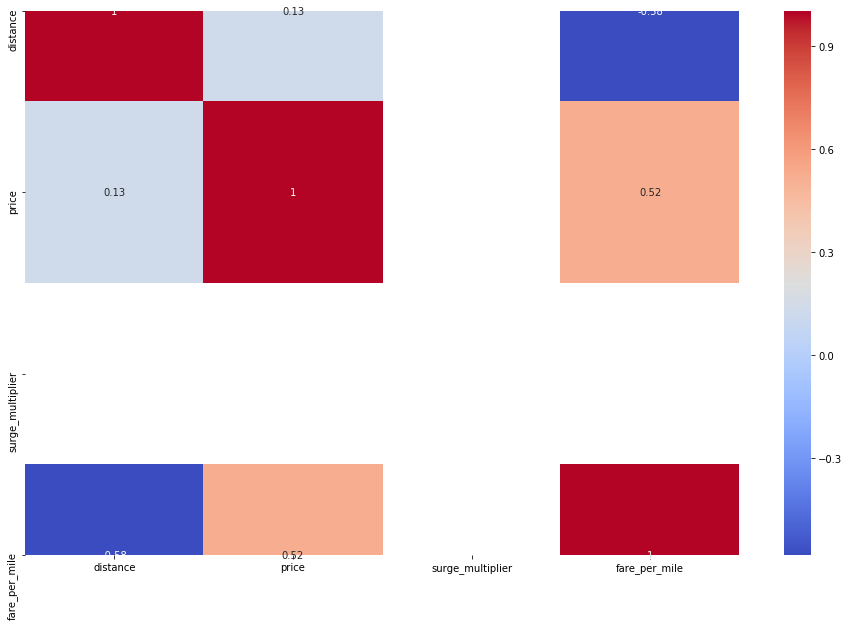

In [24]:
df_corr = df_cab.corr()
plt.figure( figsize = (16,10))
sns.heatmap(df_corr, cmap = 'coolwarm',annot = True)

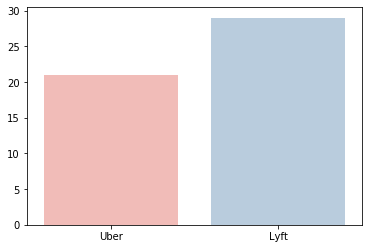

In [25]:
x=['Uber','Lyft']
y = [df_cab.cab_type[(df_cab.cab_type)=='Uber'].count(),df_cab.cab_type[(df_cab.cab_type)=='Lyft'].count()]
vis1= sns.barplot(x,y,palette='Pastel1')

In [26]:
df_weather=pd.read_csv("/content/gdrive/My Drive/KDD/weather.csv")
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [27]:
df_weather['time']= pd.to_datetime(df_weather['time_stamp'], unit='s')
df_weather['date']=df_weather['time'].dt.date
del df_weather['time_stamp']
df_weather.head(2)

,temp,location,clouds,pressure,rain,humidity,wind,time,date
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16 23:45:01,2018-12-16


In [28]:
df_merged= pd.merge(df_cab,df_weather, right_on='date',left_on='date',how='left')
df_merged.head(2)

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time_x,date,fare_per_mile,temp,location,clouds,pressure,rain,humidity,wind,time_y
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16 23:45:01
1,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000105,2018-12-16,11.36,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16 23:45:01


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23064 entries, 0 to 23063
Data columns (total 20 columns):
distance            23064 non-null float64
cab_type            23064 non-null object
destination         23064 non-null object
source              23064 non-null object
price               23064 non-null float64
surge_multiplier    23064 non-null float64
id                  23064 non-null object
product_id          23064 non-null object
name                23064 non-null object
time_x              23064 non-null datetime64[ns]
date                23064 non-null object
fare_per_mile       23064 non-null float64
temp                23064 non-null float64
location            23064 non-null object
clouds              23064 non-null float64
pressure            23064 non-null float64
rain                4574 non-null float64
humidity            23064 non-null float64
wind                23064 non-null float64
time_y              23064 non-null datetime64[ns]
dtypes: datetime64[ns](2),

In [30]:
df_merged.shape


(23064, 20)

In [31]:
from sklearn.model_selection import train_test_split
df_merged['rain'].fillna(0,inplace=True)
df_X1 = df_merged.loc[:, df_merged.columns != 'price']
df_X2 = df_X1.loc[:, df_X1.columns != 'time_x']
df_X = df_X2.loc[:, df_X2.columns != 'time_y']
#df_X = df_merged[['distance','temp','clouds', 'pressure','humidity', 'wind', 'rain']]
df_y = df_merged[['price']]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
print(X_train.count())
print(X_test.count())

distance            16144
cab_type            16144
destination         16144
source              16144
surge_multiplier    16144
id                  16144
product_id          16144
name                16144
date                16144
fare_per_mile       16144
temp                16144
location            16144
clouds              16144
pressure            16144
rain                16144
humidity            16144
wind                16144
dtype: int64
distance            6920
cab_type            6920
destination         6920
source              6920
surge_multiplier    6920
id                  6920
product_id          6920
name                6920
date                6920
fare_per_mile       6920
temp                6920
location            6920
clouds              6920
pressure            6920
rain                6920
humidity            6920
wind                6920
dtype: int64


In [0]:
x_norm_train = pd.get_dummies(X_train)
x_norm_test = pd.get_dummies(X_test)

In [33]:
x_norm_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16144 entries, 19409 to 15795
Columns: 124 entries, distance to location_West End
dtypes: float64(9), uint8(115)
memory usage: 3.0 MB


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_norm_train)
x_std_train = scaler.transform(x_norm_train)
x_std_test = scaler.transform(x_norm_test)

In [35]:
print('Mean:',np.mean(x_std_train))
print('Standard Deviation',np.std(x_std_train))
print('Mean:',np.mean(x_std_test))
print('Standard Deviation',np.std(x_std_test))


Mean: 2.6389936340957315e-17
Standard Deviation 0.9959595794363183
Mean: 0.0003560270262869531
Standard Deviation 0.9944191703431782


In [0]:
df_x_std_train = pd.DataFrame(x_std_train, columns=x_norm_train.columns)
df_x_std_test = pd.DataFrame(x_std_test, columns=x_norm_test.columns)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [38]:
pca.fit(df_x_std_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca.n_components_

57

In [0]:
df_x_std_train = pca.transform(df_x_std_train)
df_x_std_test = pca.transform(df_x_std_test)


In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(df_x_std_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [42]:
predictions = rf.predict(df_x_std_test[0].reshape(1,-1))
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: price    6.58
dtype: float64 degrees.


In [43]:
mape = 100 * (errors / y_test)
from sklearn.model_selection import cross_validate
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: price    55.52
dtype: float64 %.
